

# Project: Investigate a Dataset - [TMDB 5000 Movie Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> "This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue." the data set contain columen as follows: 

>(Id:The identification number of each movie, Popularity:the popularity of the movies, Budget:an estimate of expenditure on movie, Revenue:income, Runtime:the time that a movie lasts, Genres:genres of movie, Release_date, Release_year, budget_adj, original_title, cast, homepage, vote_count, vote_average, imdb_id: The identification number of each movie on TMDb, director, keywords, tagline, production_companies, overview)


### Question(s) for Analysis
> 1- What are the effects of budget value, popularity, and vote_average on revenue?

> 2- What is the state of people's response to voting over the years?


In [71]:
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
#importing all packages needed for coding
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#using "matplotlib inline" for visualizations so it will be plotted inline with the notebook.
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, the data has been loaded, cleanliness checked, and then the data set trimmed and cleaned for analysis thus answering the questions.

In [72]:
# load movies data into data frame
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
# display first five rows of data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [73]:
#explore dimensions of the dataframe
df.shape

(10866, 21)

### Data Cleaning
>Based on the questions, columns that are not needed will be dropped

#### Null values:

In [74]:
#checking null values:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> Looking at the numbers above, it appears that there is missing data in the following columns:imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies. Fortunately this missing data does not affect the analysis so it will be ignored

#### Drop unneeded columns:

In [75]:
# print the column labels in the dataframe
for i, v in enumerate(df.columns):
    print(i, v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


In [76]:
#drop unneeded columns
df.drop(['imdb_id', 'original_title', 'cast','homepage','director', 'tagline','keywords','overview' ,'runtime', 'genres',
         'production_companies','release_date','budget_adj','revenue_adj'], axis = 1, inplace = True)
# display first five rows of data
df.head()

,id,popularity,budget,revenue,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,5562,6.5,2015
1,76341,28.419936,150000000,378436354,6185,7.1,2015
2,262500,13.112507,110000000,295238201,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,2947,7.3,2015


In [77]:
#explore dimensions of the dataframe after dropping unneeded columns
df.shape

(10866, 7)

#### Datatypes:

In [78]:
# explore the datatypes of the columns
df.dtypes

id                int64
popularity      float64
budget            int64
revenue           int64
vote_count        int64
vote_average    float64
release_year      int64
dtype: object

In [79]:
#needs to change the data type id to string
df['id']=df['id'].astype(str)
df.dtypes

id               object
popularity      float64
budget            int64
revenue           int64
vote_count        int64
vote_average    float64
release_year      int64
dtype: object

#### Delete rows where budget or budget is Zero:
>The presence of zero values greatly affects the result of the analysis, so it will be deleted, as the presence of zero as a movie budget value or as a revenue value is inaccurate

In [80]:
#check rows wuth 0 budget
df[df.budget == 0]

,id,popularity,budget,revenue,vote_count,vote_average,release_year
30,280996,3.927333,0,29355203,425,6.4,2015
36,339527,3.358321,0,22354572,474,6.2,2015
72,284289,2.272044,0,45895,81,5.5,2015
74,347096,2.165433,0,0,27,5.1,2015
75,308369,2.141506,0,0,569,7.7,2015
88,301875,1.959765,0,2000000,135,5.6,2015
92,370687,1.876037,0,0,11,5.4,2015
95,258509,1.841779,0,233755553,278,5.7,2015
100,326359,1.724712,0,0,475,7.0,2015
101,254302,1.661789,0,0,161,5.4,2015


In [81]:
#delete the 0 budget rows
df = df[df.budget != 0]
df[df.budget == 0]

,id,popularity,budget,revenue,vote_count,vote_average,release_year


#### Delete rows where budget or revenue is Zero:

In [82]:
#check rows wuth 0 revenue
df[df.revenue == 0]

,id,popularity,budget,revenue,vote_count,vote_average,release_year
48,265208,2.932340,30000000,0,481,5.3,2015
67,334074,2.331636,20000000,0,280,5.4,2015
93,307663,1.872696,10000000,0,181,4.1,2015
133,157827,1.251681,11000000,0,43,6.3,2015
145,294963,1.073349,1800000,0,220,6.3,2015
149,346808,1.041922,20000000,0,100,5.8,2015
154,314405,1.008474,12000000,0,211,5.7,2015
156,157843,0.973316,15000000,0,30,6.0,2015
159,251516,0.953046,630019,0,487,7.7,2015
165,347969,0.913085,60000000,0,252,4.8,2015


In [83]:
#delete the 0 revenue rows
df = df[df.revenue != 0]
df[df.revenue == 0]

,id,popularity,budget,revenue,vote_count,vote_average,release_year


In [84]:
df.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year
count,3855.000000,3.855000e+03,3.855000e+03,3855.000000,3855.00000,3855.000000
mean,1.191400,3.720183e+07,1.076589e+08,527.611933,6.16786,2001.263294
std,1.475002,4.220291e+07,1.765248e+08,879.868374,0.79504,11.281989
min,0.001117,1.000000e+00,2.000000e+00,10.000000,2.20000,1960.000000
25%,0.462448,1.000000e+07,1.357645e+07,71.000000,5.70000,1995.000000
50%,0.797298,2.400000e+07,4.479322e+07,204.000000,6.20000,2004.000000
75%,1.368245,5.000000e+07,1.241530e+08,580.000000,6.70000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,9767.000000,8.40000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis


###  1- What are the effects of budget value, popularity, and vote_average on revenue?


In [85]:
#explore the data. 
df.head()

,id,popularity,budget,revenue,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,5562,6.5,2015
1,76341,28.419936,150000000,378436354,6185,7.1,2015
2,262500,13.112507,110000000,295238201,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,2947,7.3,2015


Next will study the effect of popularity on revenue

Popularity will be classified into 4 levels to measure its impact on returns

In [86]:
df.describe().popularity

count    3855.000000
mean        1.191400
std         1.475002
min         0.001117
25%         0.462448
50%         0.797298
75%         1.368245
max        32.985763
Name: popularity, dtype: float64

In [87]:
#Assign the values to 'Levels'
Levels = [0.00,  0.46, 0.80, 1.37, 32.99]

In [88]:
#levels labels
Levels_names = ['low', 'medium', 'Moderately High', 'high']

In [89]:
# Creates popularity_levels column
df['popularity_levels'] = pd.cut(df['popularity'], Levels, labels=Levels_names)

# Checks for successful creation of this column
df.head()

,id,popularity,budget,revenue,vote_count,vote_average,release_year,popularity_levels
0,135397,32.985763,150000000,1513528810,5562,6.5,2015,high
1,76341,28.419936,150000000,378436354,6185,7.1,2015,high
2,262500,13.112507,110000000,295238201,2480,6.3,2015,high
3,140607,11.173104,200000000,2068178225,5292,7.5,2015,high
4,168259,9.335014,190000000,1506249360,2947,7.3,2015,high


In [91]:
# create function for plotting
def myPlot(df,grpVar,yVar,stat='mean'):
    
    df.groupby([grpVar])[yVar].agg(stat).plot.bar(color=['y'],figsize=[14,6],rot=0,width=0.8);
    grpVar=grpVar.replace("_"," ")
    yVar=yVar.replace("_","")
    
    plt.title(f'{stat} of {yVar} by {grpVar}'.title(),fontsize=14, weight='bold')
    plt.xlabel(grpVar.title(),fontsize=10,weight="bold")
    plt.ylabel(f'{stat} {yVar}'.title(),fontsize=10, weight='bold')

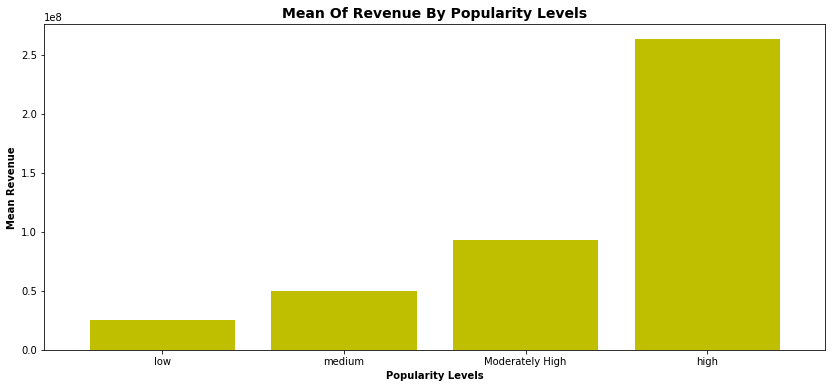

In [92]:
myPlot(df,'popularity_levels','revenue')

Looking at the chart above, it appears that the more popular the movie, the higher the revenue

Next will study the effect of vote_average on revenue
>vote_average will be classified into 4 levels to measure its impact on revenue

In [93]:
df.describe().vote_average

count    3855.00000
mean        6.16786
std         0.79504
min         2.20000
25%         5.70000
50%         6.20000
75%         6.70000
max         8.40000
Name: vote_average, dtype: float64

In [94]:
#Assign the values to 'Levels'
bin_edges = [2.20, 5.70, 6.20, 6.70, 8.40]

In [95]:
#levels labels
bin_names = ['low', 'medium', 'Moderately High', 'high']

In [96]:
# Creates vote_average_Levels column
df['vote_average_Levels'] = pd.cut(df['vote_average'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.head()

,id,popularity,budget,revenue,vote_count,vote_average,release_year,popularity_levels,vote_average_Levels
0,135397,32.985763,150000000,1513528810,5562,6.5,2015,high,Moderately High
1,76341,28.419936,150000000,378436354,6185,7.1,2015,high,high
2,262500,13.112507,110000000,295238201,2480,6.3,2015,high,Moderately High
3,140607,11.173104,200000000,2068178225,5292,7.5,2015,high,high
4,168259,9.335014,190000000,1506249360,2947,7.3,2015,high,high


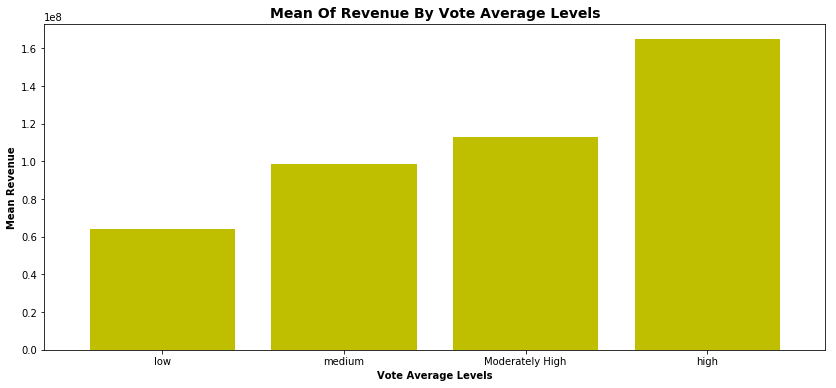

In [97]:
myPlot(df,'vote_average_Levels','revenue')

Looking at the chart above, it appears that the more votes averages to a movie, the higher the revenue

Next will study the effect of budget on revenue
>budget will be classified into 2 levels usong median to measure its impact on revenue

In [98]:
# Use query to select each group and get its mean revenue
median = df['budget'].median()
low = df.query('budget < {}'.format(median))
high = df.query('budget >= {}'.format(median))

mean_revenue_low = low['revenue'].mean()
mean_revenue_high = high['revenue'].mean()

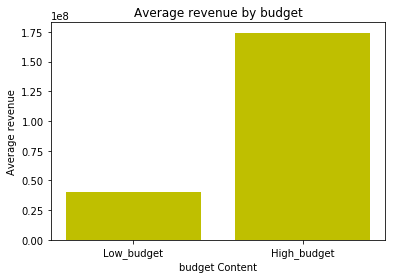

In [103]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_revenue_low, mean_revenue_high]
labels = ['Low_budget', 'High_budget']
plt.bar(locations, heights, tick_label=labels, color=['y'],width=0.8)
plt.title('Average revenue by budget')
plt.xlabel('budget Content')
plt.ylabel('Average revenue');

In [104]:
df.head()

,id,popularity,budget,revenue,vote_count,vote_average,release_year,popularity_levels,vote_average_Levels
0,135397,32.985763,150000000,1513528810,5562,6.5,2015,high,Moderately High
1,76341,28.419936,150000000,378436354,6185,7.1,2015,high,high
2,262500,13.112507,110000000,295238201,2480,6.3,2015,high,Moderately High
3,140607,11.173104,200000000,2068178225,5292,7.5,2015,high,high
4,168259,9.335014,190000000,1506249360,2947,7.3,2015,high,high


Looking at the chart above, it appears that movies with a higher budget clearly return with better revenue.

###  2- What is the state of people's response to voting over the years?

In [105]:
#explore the data. 
df.head()

,id,popularity,budget,revenue,vote_count,vote_average,release_year,popularity_levels,vote_average_Levels
0,135397,32.985763,150000000,1513528810,5562,6.5,2015,high,Moderately High
1,76341,28.419936,150000000,378436354,6185,7.1,2015,high,high
2,262500,13.112507,110000000,295238201,2480,6.3,2015,high,Moderately High
3,140607,11.173104,200000000,2068178225,5292,7.5,2015,high,high
4,168259,9.335014,190000000,1506249360,2947,7.3,2015,high,high


Text(0.5,1,'state of peoples response to voting over the years')

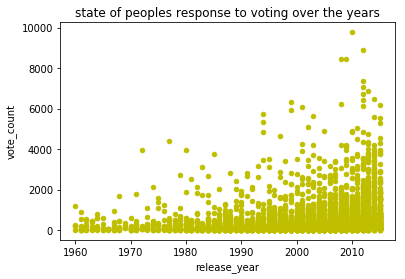

In [106]:
df.plot(x='release_year', y='vote_count',kind = 'scatter',color=['y'])
plt.title('state of peoples response to voting over the years')

Looking at the graph above shows that the number of people who voted has increased over the years

<a id='conclusions'></a>
## Conclusions
Two questions were researched, the first was "What are the effects of budget value, popularity, and vote_average on revenue?", and the results were as follows: It was found that the revenues are directly proportional to each of the budgets, the popularity, and the average voter. As for the second question, which is " What is the state of people's response to voting over the years?", the results show that the number of people who made vote increased over time

#### Limitations
Many columns have been dropped to get more accurate results


## References: 

>The tutorials and case studies from the course

>https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

>https://stackoverflow.com/questions/22231592/pandas-change-data-type-of-series-to-string

>The reviewer comments

In [70]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0